In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


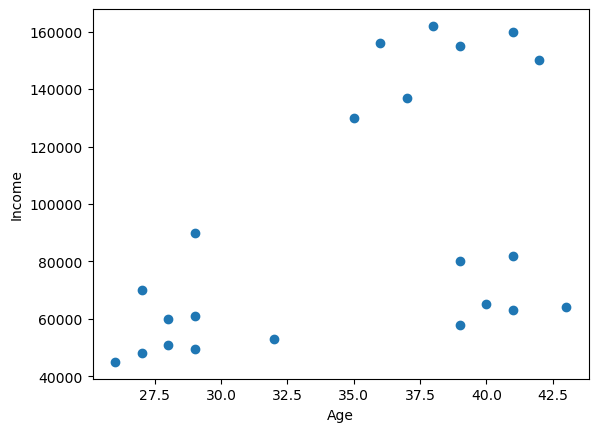

In [7]:
plt.scatter(df.Age,df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [10]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\sagar\Documents\Python Scripts\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sagar\Documents\Python Scripts\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [11]:
df["clusters"]=y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,70000,1
1,Michael,0.176471,90000,1
2,Mohan,0.176471,61000,2
3,Ismail,0.117647,60000,2
4,Kory,0.941176,150000,0


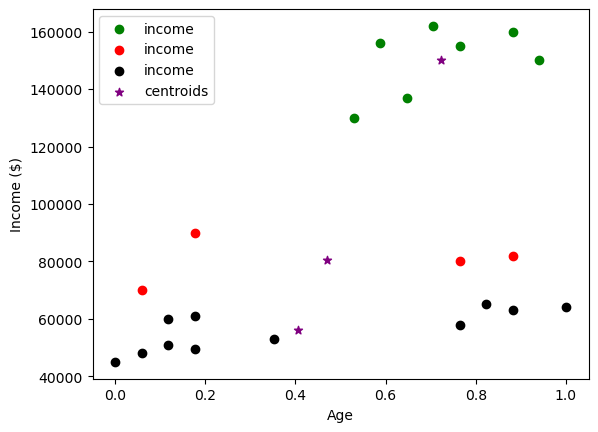

In [14]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]
df3 = df[df.clusters==2]
plt.scatter(df1.Age,df1["Income($)"],color="green",label="income")
plt.scatter(df2.Age,df2['Income($)'],color='red',label="income")
plt.scatter(df3.Age,df3['Income($)'],color='black',label="income")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroids")
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [21]:
scaler=MinMaxScaler()
scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[["Age"]])

In [22]:
scaler.fit(df[["Income($)"]])
df["Income($)"]=scaler.transform(df[["Income($)"]])

In [23]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [24]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\sagar\Documents\Python Scripts\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sagar\Documents\Python Scripts\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [25]:
df["clusters"]=y_predicted

In [26]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
